# Focus points

- EDA 
- Preprocessing
- Classification models
- Evaluation

# Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the dataset

In [2]:
loan_data = pd.read_csv('loan_data.csv')

In [3]:
loan_data

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,27.0,male,Associate,47971.0,6,RENT,15000.0,MEDICAL,15.66,0.31,3.0,645,No,1
44996,37.0,female,Associate,65800.0,17,RENT,9000.0,HOMEIMPROVEMENT,14.07,0.14,11.0,621,No,1
44997,33.0,male,Associate,56942.0,7,RENT,2771.0,DEBTCONSOLIDATION,10.02,0.05,10.0,668,No,1
44998,29.0,male,Bachelor,33164.0,4,RENT,12000.0,EDUCATION,13.23,0.36,6.0,604,No,1


# 1. Exploratory data analysis

## 1.1 First 5 rows of loan data

In [4]:
# printing first 5 rows of the dataset
loan_data.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


## 1.2 Last 5 rows of loan data

In [5]:
# printing last 5 rows of the dataset 
loan_data.tail()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
44995,27.0,male,Associate,47971.0,6,RENT,15000.0,MEDICAL,15.66,0.31,3.0,645,No,1
44996,37.0,female,Associate,65800.0,17,RENT,9000.0,HOMEIMPROVEMENT,14.07,0.14,11.0,621,No,1
44997,33.0,male,Associate,56942.0,7,RENT,2771.0,DEBTCONSOLIDATION,10.02,0.05,10.0,668,No,1
44998,29.0,male,Bachelor,33164.0,4,RENT,12000.0,EDUCATION,13.23,0.36,6.0,604,No,1
44999,24.0,male,High School,51609.0,1,RENT,6665.0,DEBTCONSOLIDATION,17.05,0.13,3.0,628,No,1


## 1.3 Dataset statistics

In [6]:
# printing datasets statistics
loan_data_description = loan_data.describe()

loan_data_description

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
count,45000.000000,4.500000e+04,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000
mean,27.764178,8.031905e+04,5.410333,9583.157556,11.006606,0.139725,5.867489,632.608756,0.222222
std,6.045108,8.042250e+04,6.063532,6314.886691,2.978808,0.087212,3.879702,50.435865,0.415744
min,20.000000,8.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,390.000000,0.000000
25%,24.000000,4.720400e+04,1.000000,5000.000000,8.590000,0.070000,3.000000,601.000000,0.000000
50%,26.000000,6.704800e+04,4.000000,8000.000000,11.010000,0.120000,4.000000,640.000000,0.000000
75%,30.000000,9.578925e+04,8.000000,12237.250000,12.990000,0.190000,8.000000,670.000000,0.000000
max,144.000000,7.200766e+06,125.000000,35000.000000,20.000000,0.660000,30.000000,850.000000,1.000000


## 1.4 Dataset columns 

In [7]:
# printing datasets columns
loan_data_columns = loan_data.columns

loan_data_columns

Index(['person_age', 'person_gender', 'person_education', 'person_income',
       'person_emp_exp', 'person_home_ownership', 'loan_amnt', 'loan_intent',
       'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length',
       'credit_score', 'previous_loan_defaults_on_file', 'loan_status'],
      dtype='object')

## 1.5 Column Data types

In [8]:
# printing all column datatypes
loan_data_types = loan_data.dtypes

loan_data_types

person_age                        float64
person_gender                      object
person_education                   object
person_income                     float64
person_emp_exp                      int64
person_home_ownership              object
loan_amnt                         float64
loan_intent                        object
loan_int_rate                     float64
loan_percent_income               float64
cb_person_cred_hist_length        float64
credit_score                        int64
previous_loan_defaults_on_file     object
loan_status                         int64
dtype: object

## 1.6 Column unique value count

In [9]:
# printing all collumns unique count
loan_data_unique = loan_data.nunique()

loan_data_unique

person_age                           60
person_gender                         2
person_education                      5
person_income                     33989
person_emp_exp                       63
person_home_ownership                 4
loan_amnt                          4483
loan_intent                           6
loan_int_rate                      1302
loan_percent_income                  64
cb_person_cred_hist_length           29
credit_score                        340
previous_loan_defaults_on_file        2
loan_status                           2
dtype: int64

## 1.7 Missing value count

In [10]:
# finding all missing values in the dataset

missing_data = loan_data.isnull().sum()

print('Missing values:\n' +  str(missing_data))

Missing values:
person_age                        0
person_gender                     0
person_education                  0
person_income                     0
person_emp_exp                    0
person_home_ownership             0
loan_amnt                         0
loan_intent                       0
loan_int_rate                     0
loan_percent_income               0
cb_person_cred_hist_length        0
credit_score                      0
previous_loan_defaults_on_file    0
loan_status                       0
dtype: int64


## 1.8 Duplicate Value count 

In [11]:
# finding all duplicate values in the dataset

duplicated_data = loan_data.duplicated().sum()

print('Duplicated values: ' +  str(duplicated_data))

Duplicated values: 0


## 1.9 Visualisations

### 1.9.1 Loan status count

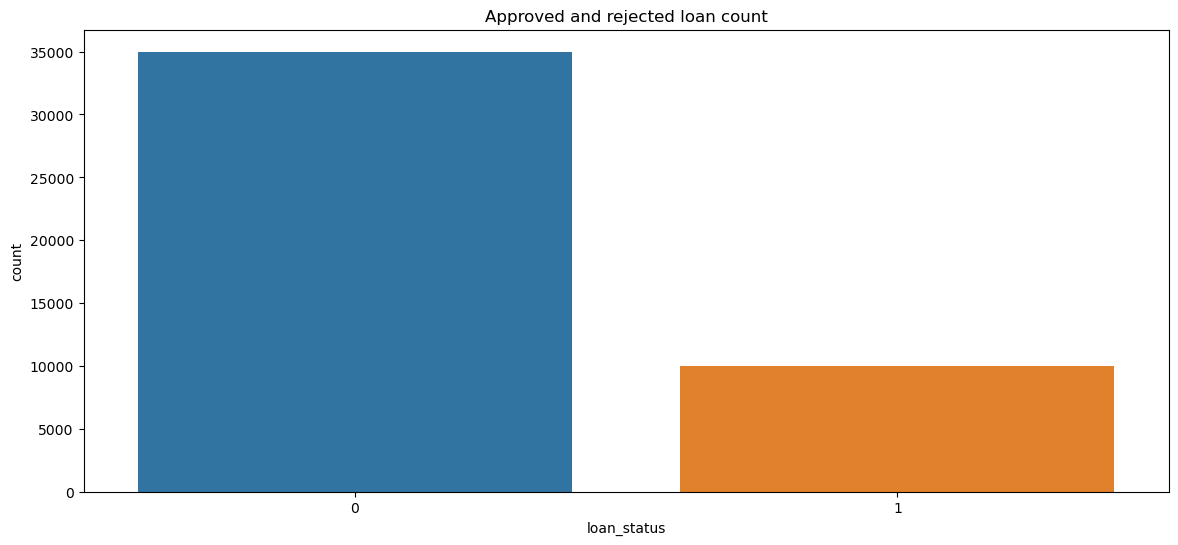

In [12]:
# function to present loan status count

def LoanStatusCount(data): 
    plt.figure(figsize=(14,6))
    sns.countplot(data=loan_data, x='loan_status')
    plt.title('Approved and rejected loan count')
    plt.show()
    
LoanStatusCount(loan_data)

### 1.9.2 Person gender count

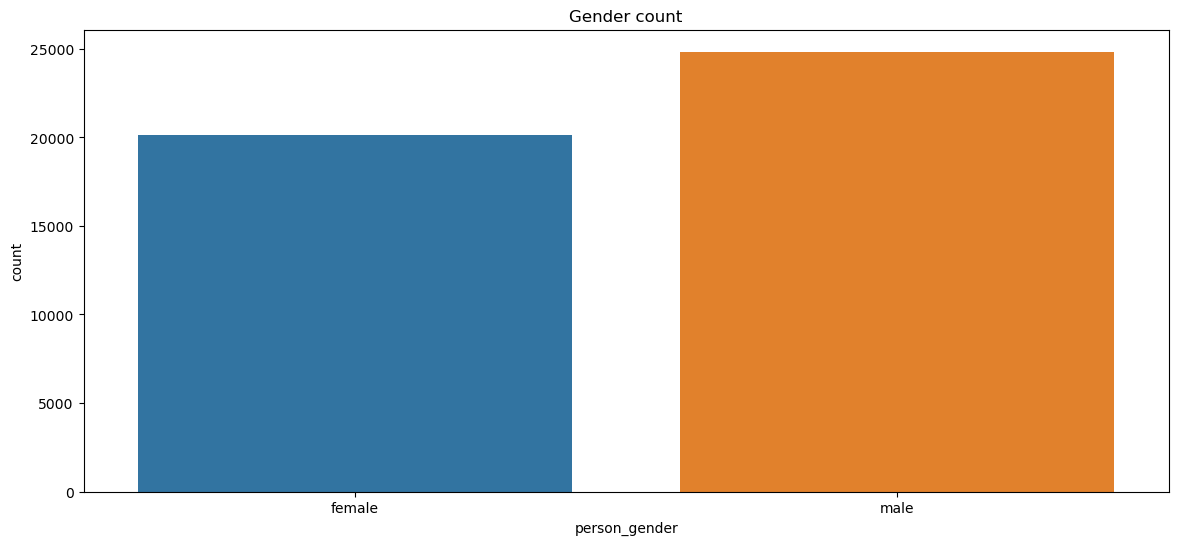

In [13]:
# function to present person genders

def GenderCount(data): 
    plt.figure(figsize=(14,6))
    sns.countplot(data=loan_data, x='person_gender')
    plt.title('Gender count')
    plt.show()
    
GenderCount(loan_data)

### 1.9.3 Loan intent count

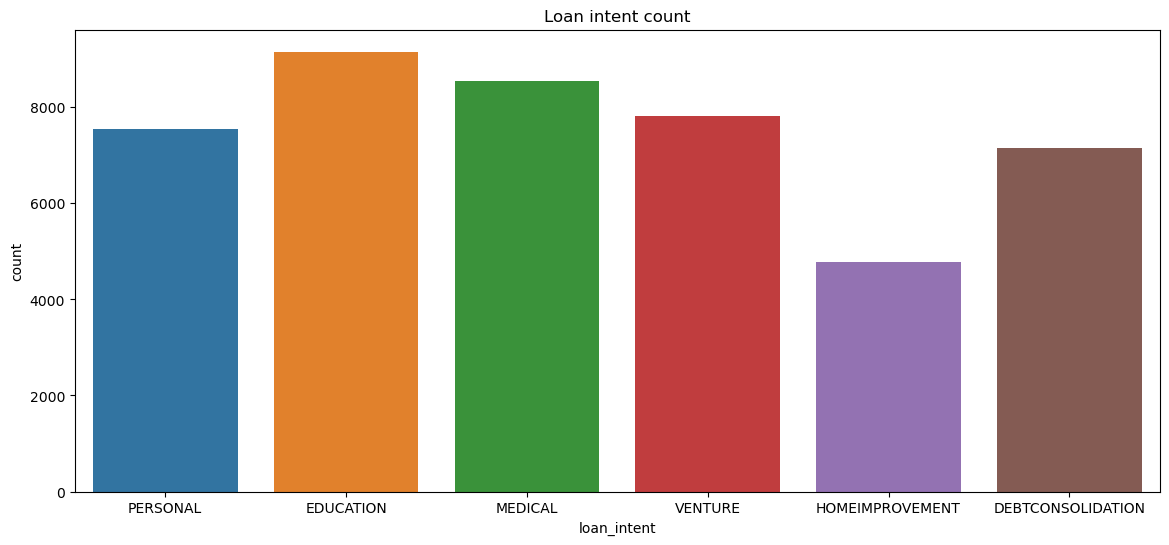

In [14]:
# function to present a loan intent count

def LoanIntentCount(data): 
    plt.figure(figsize=(14,6))
    sns.countplot(data=loan_data, x='loan_intent')
    plt.title('Loan intent count')
    plt.show()
    
LoanIntentCount(loan_data)

### 1.9.4 Person education count

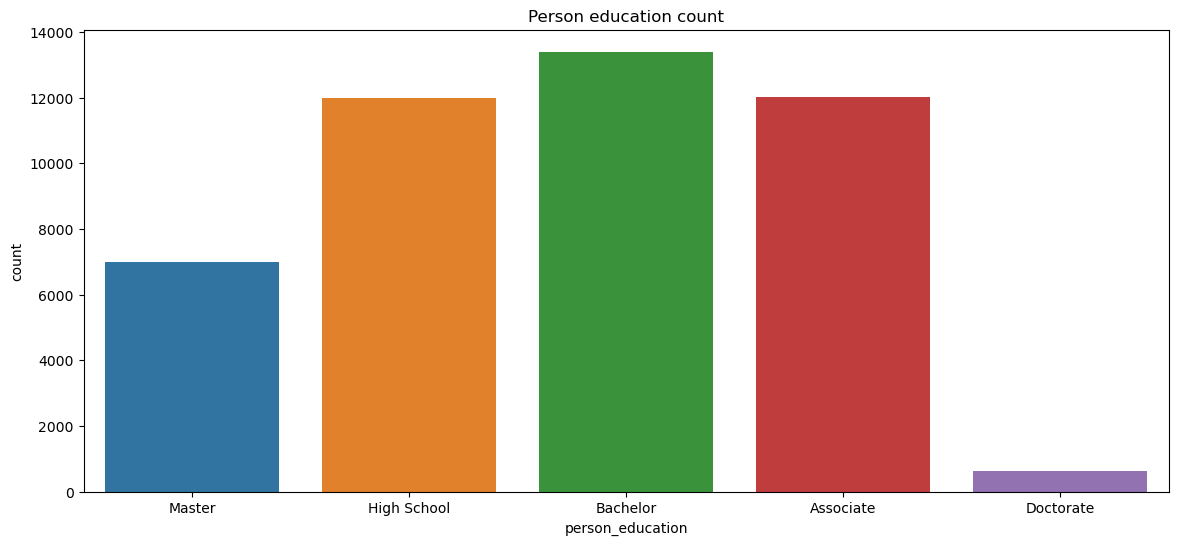

In [15]:
# function to present person education count

def PersonEducationCount(data): 
    plt.figure(figsize=(14,6))
    sns.countplot(data=loan_data, x='person_education')
    plt.title('Person education count')
    plt.show()
    
PersonEducationCount(loan_data)

### 1.9.5 Loan amount to person age relationship

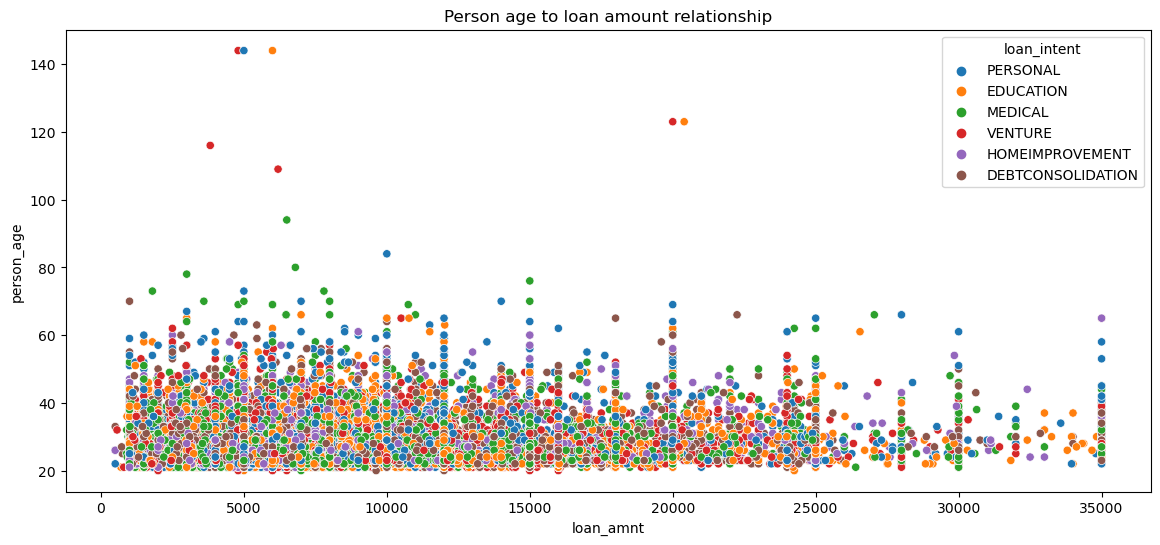

In [16]:
# function to present person age relationship

def PersonAgeCount(data): 
    plt.figure(figsize=(14,6))
    sns.scatterplot(data=loan_data, x='loan_amnt', y='person_age', hue='loan_intent')
    plt.title('Person age to loan amount relationship')
    plt.show()
    
PersonAgeCount(loan_data)

### 1.9.6 Age distribution of approved loans

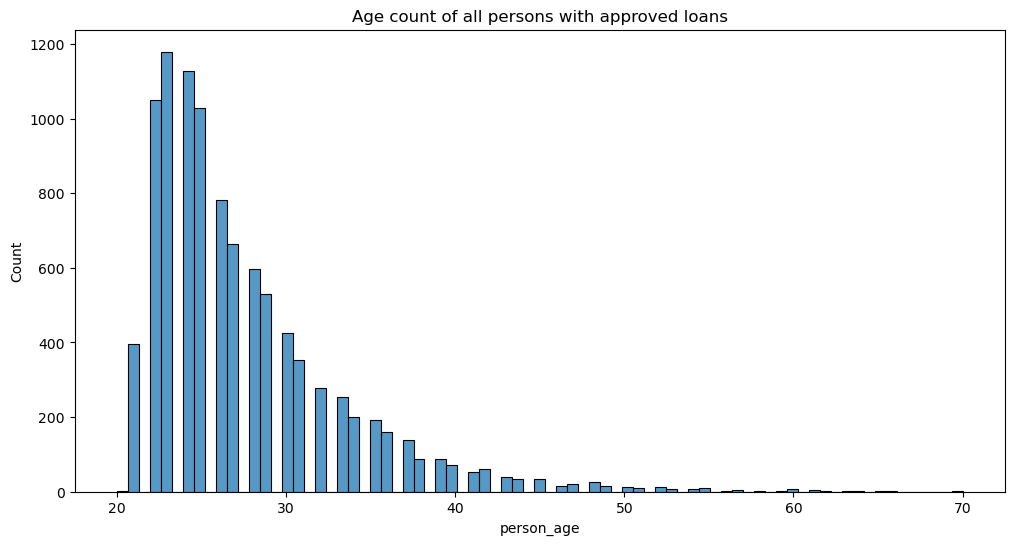

In [17]:
# Creating a barchart visualising age distribution of all loans

def ApprovedLoanAges(data):
    plt.figure(figsize=(12,6))
    sns.histplot(data=loan_data[loan_data['loan_status'] == 1], x='person_age')
    plt.title("Age count of all persons with approved loans")
    plt.show()
    
ApprovedLoanAges(loan_data)

### 1.9.7 Age count of all approved and rejected loans

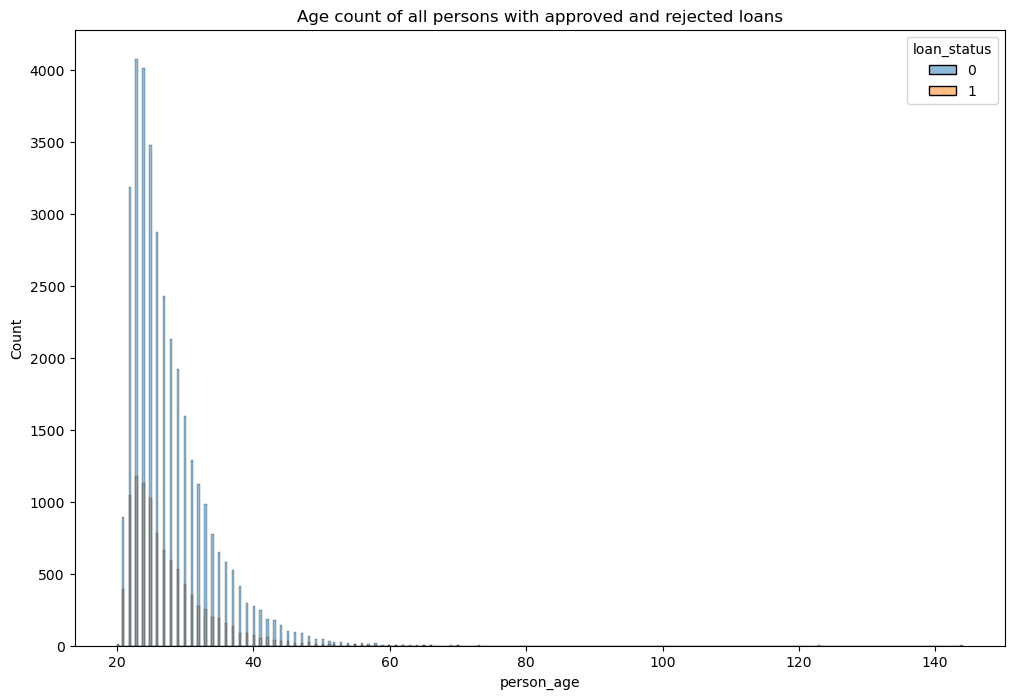

In [18]:
# Creating a barchart visualising age count of all approved and rejected loans

def ApprovedLoanAges(data):
    plt.figure(figsize=(12,8))
    sns.histplot(data=loan_data, x='person_age', hue=loan_data['loan_status'])    
    plt.title("Age count of all persons with approved and rejected loans")
    plt.show()
    
ApprovedLoanAges(loan_data)

### 1.9.8 Age to credit score relationship

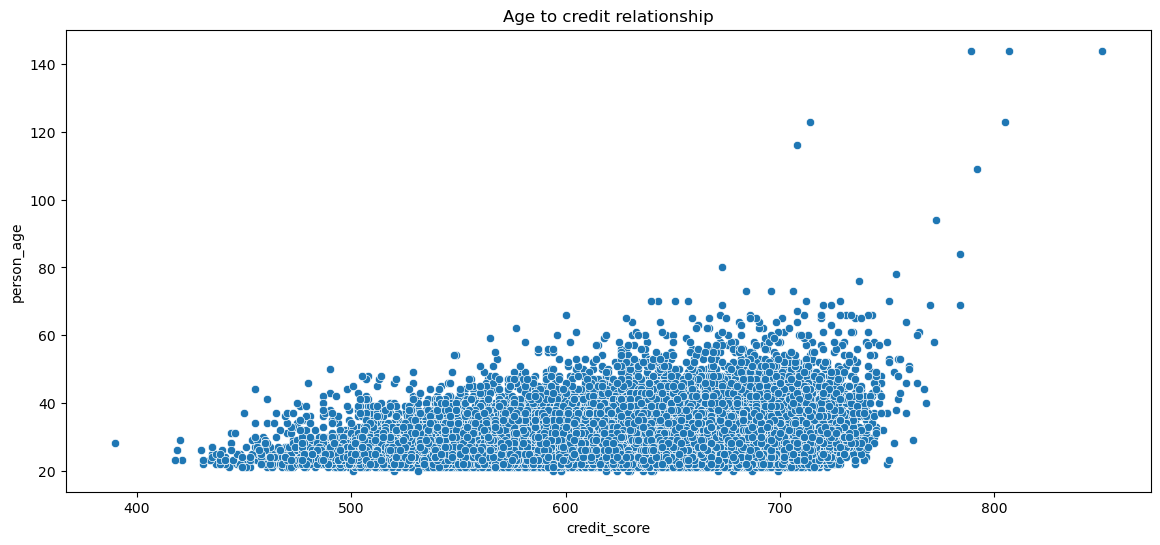

In [19]:
# function to present age to credit relationship

def CreditScoreAge(data): 
    plt.figure(figsize=(14,6))
    sns.scatterplot(data=loan_data, x='credit_score', y='person_age')
    plt.title('Age to credit relationship')
    plt.show()
    
CreditScoreAge(loan_data)

### 1.9.9 Person home ownership status

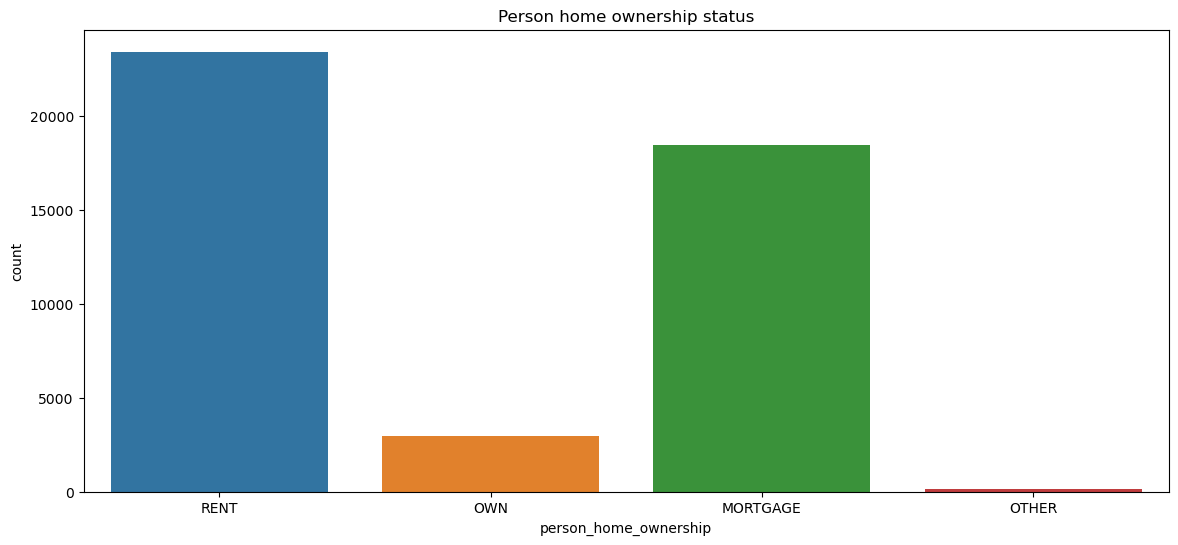

In [20]:
# function to present a loan intent count

def HomeOwnershipCount(data): 
    plt.figure(figsize=(14,6))
    sns.countplot(data=loan_data, x='person_home_ownership')
    plt.title('Person home ownership status')
    plt.show()
    
HomeOwnershipCount(loan_data)

### 1.9.10 Person income to loan amount relationship

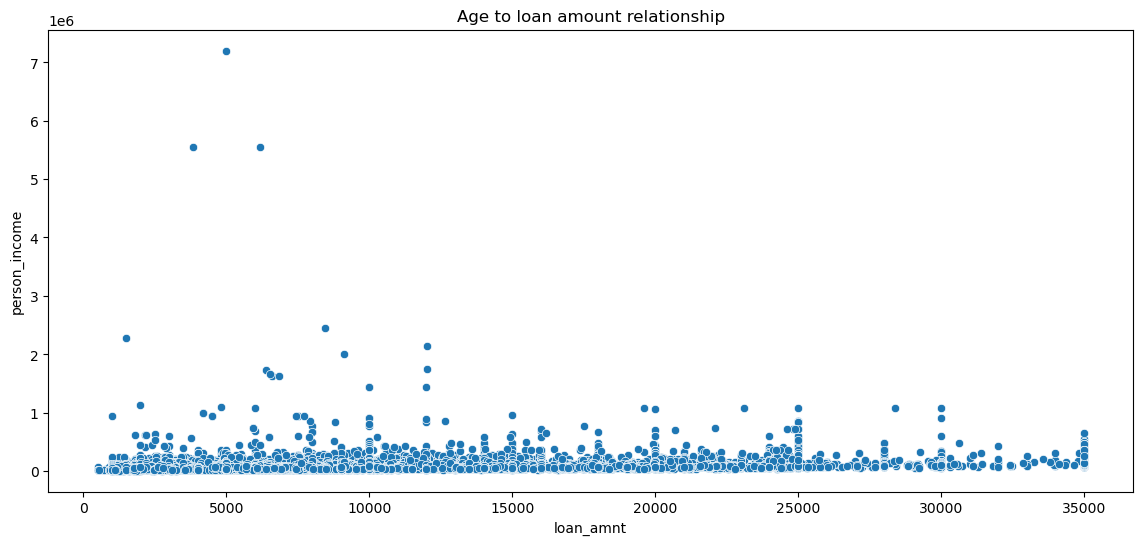

In [21]:
# function to present a loan intent count

def IncomeLoanAmountScatter(data): 
    plt.figure(figsize=(14,6))
    sns.scatterplot(data=loan_data, x='loan_amnt', y='person_income')
    plt.title('Age to loan amount relationship')
    plt.show()
    
IncomeLoanAmountScatter(loan_data)

### 1.9.11 Person experience to income relationship

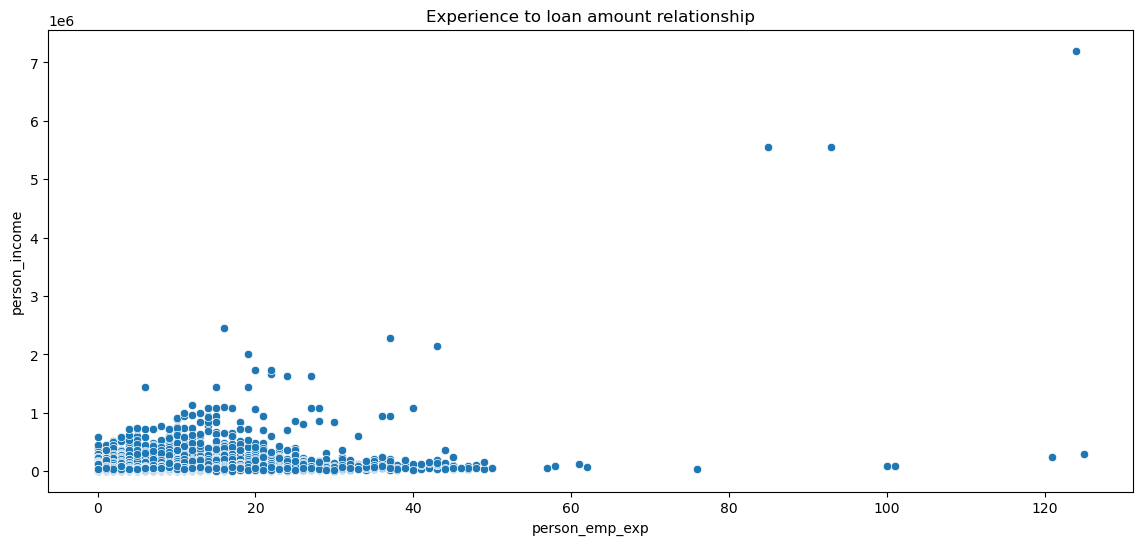

In [22]:
# function to present person income to experience relationship

def IncomeExperienceScatter(data): 
    plt.figure(figsize=(14,6))
    sns.scatterplot(data=loan_data, x='person_emp_exp', y='person_income')
    plt.title('Experience to loan amount relationship')
    plt.show()
    
IncomeExperienceScatter(loan_data)

### 1.9.12 Distribution of all numerical features in the dataset 

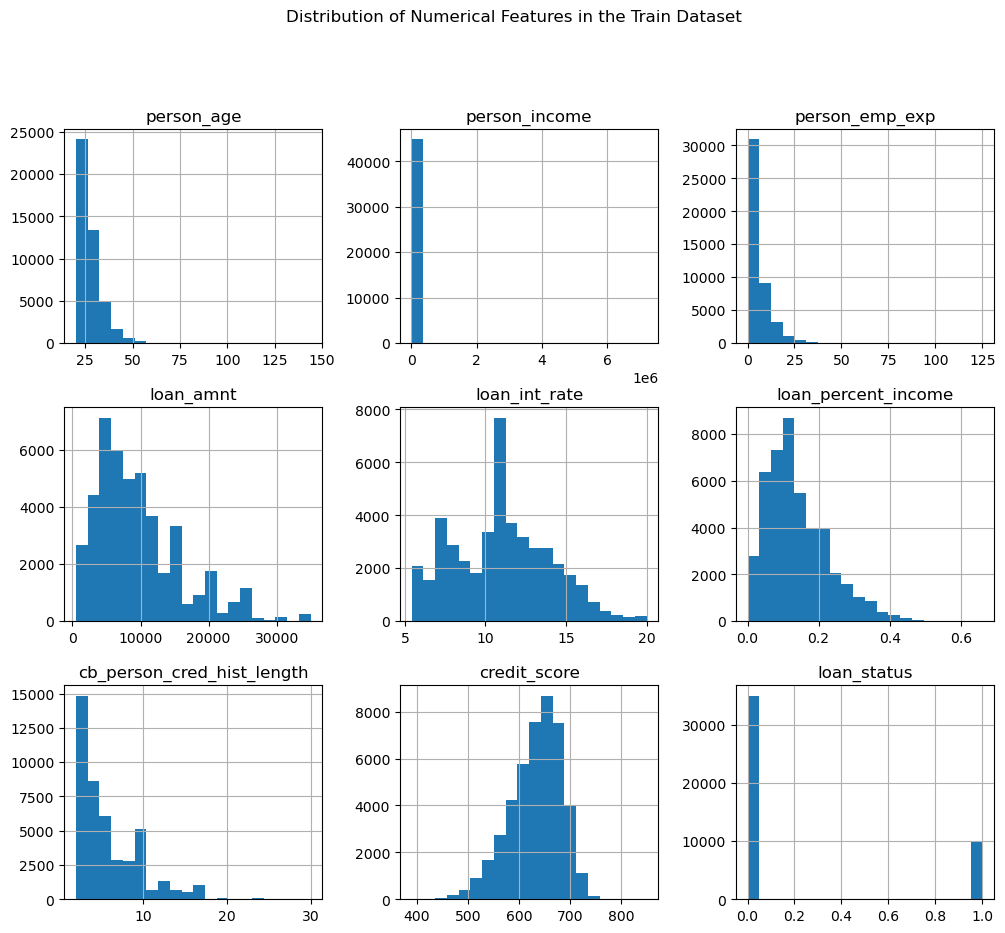

In [23]:
# function visualising numerical fetaures in the dataset

def numDistribution(data):
    loan_data.hist(figsize=(12, 10), bins=20)
    plt.suptitle("Distribution of Numerical Features in the Train Dataset", y=1.0, fontsize=12)
    plt.show()
    
numDistribution(loan_data)

### 1.9.13 Visualising potential outliers using box plots

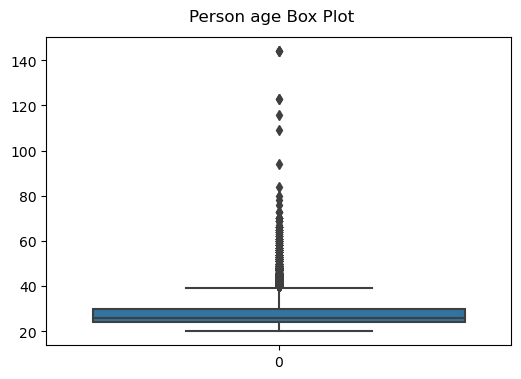

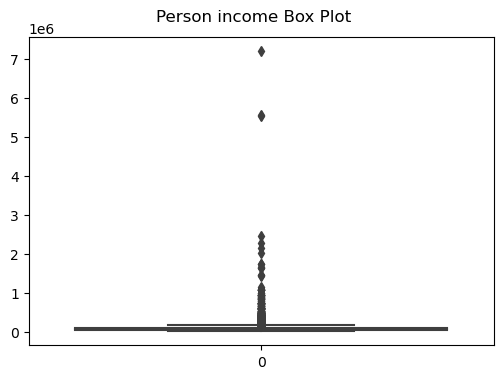

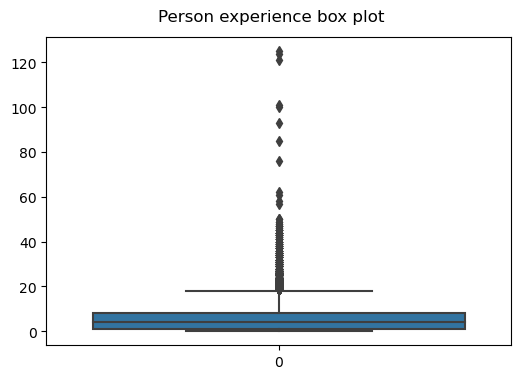

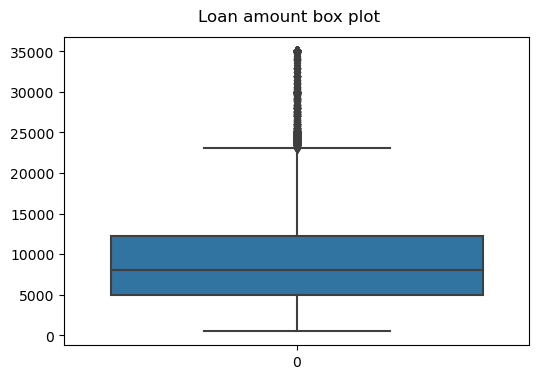

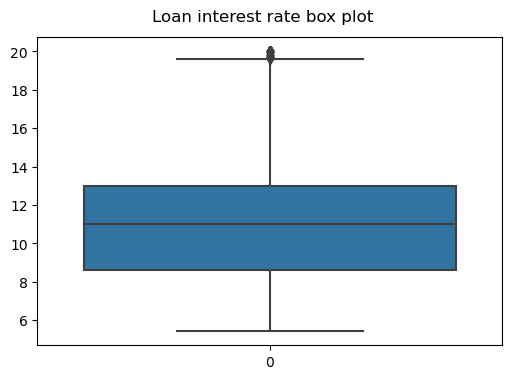

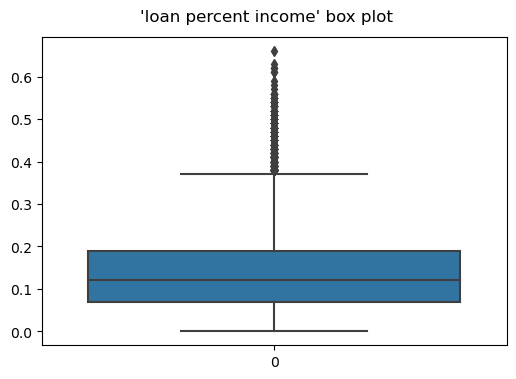

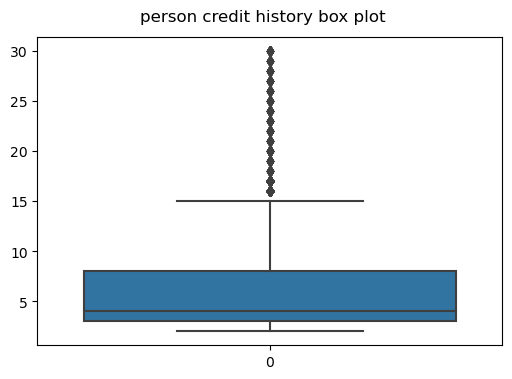

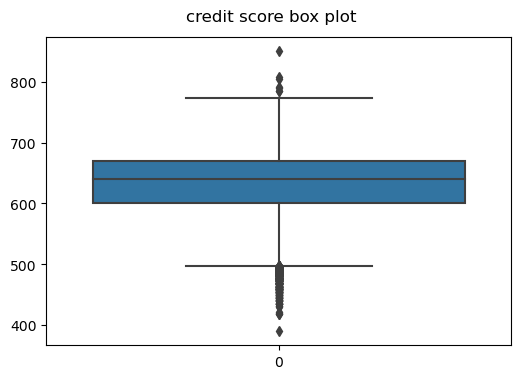

In [24]:
# creating box plots to visualise outliers in each of the 'Unit cost', 'Unit Price', 'Order Quantity' and 'discount applied'

def BoxPlotsAge(data):
    plt.figure(figsize=(6,4))
    sns.boxplot(data=loan_data["person_age"])
    plt.suptitle("Person age Box Plot", y=0.95, fontsize=12)
    plt.show()
    
def BoxPlotsIncome(data):
    plt.figure(figsize=(6,4))
    sns.boxplot(data=loan_data["person_income"])
    plt.suptitle("Person income Box Plot", y=0.95, fontsize=12)
    plt.show()
    
def BoxPlotsOrderExperience(data):
    plt.figure(figsize=(6,4))
    sns.boxplot(data=loan_data["person_emp_exp"])
    plt.suptitle("Person experience box plot", y=0.95, fontsize=12)
    plt.show()
    
def BoxPlotsLoanAmount(data):
    plt.figure(figsize=(6,4))
    sns.boxplot(data=loan_data["loan_amnt"])
    plt.suptitle("Loan amount box plot", y=0.95, fontsize=12)
    plt.show()
    
def BoxPlotsIntRate(data):
    plt.figure(figsize=(6,4))
    sns.boxplot(data=loan_data["loan_int_rate"])
    plt.suptitle("Loan interest rate box plot", y=0.95, fontsize=12)
    plt.show()
    
def BoxPlotsLoanPercentIncome(data):
    plt.figure(figsize=(6,4))
    sns.boxplot(data=loan_data["loan_percent_income"])
    plt.suptitle("'loan percent income' box plot", y=0.95, fontsize=12)
    plt.show()
    
def BoxPlotsCreditHist(data):
    plt.figure(figsize=(6,4))
    sns.boxplot(data=loan_data["cb_person_cred_hist_length"])
    plt.suptitle("person credit history box plot", y=0.95, fontsize=12)
    plt.show()
    
def BoxPlotsCredit(data):
    plt.figure(figsize=(6,4))
    sns.boxplot(data=loan_data["credit_score"])
    plt.suptitle("credit score box plot", y=0.95, fontsize=12)
    plt.show()
    
    
BoxPlotsAge(loan_data)
BoxPlotsIncome(loan_data)
BoxPlotsOrderExperience(loan_data)
BoxPlotsLoanAmount(loan_data)
BoxPlotsIntRate(loan_data)
BoxPlotsLoanPercentIncome(loan_data)
BoxPlotsCreditHist(loan_data)
BoxPlotsCredit(loan_data)

# 2. Preprocessing 

## 2.1 Handling missing values

In [25]:
# printing missing values within the dataset

print('Missing values:\n' +  str(missing_data))

Missing values:
person_age                        0
person_gender                     0
person_education                  0
person_income                     0
person_emp_exp                    0
person_home_ownership             0
loan_amnt                         0
loan_intent                       0
loan_int_rate                     0
loan_percent_income               0
cb_person_cred_hist_length        0
credit_score                      0
previous_loan_defaults_on_file    0
loan_status                       0
dtype: int64


## 2.2 Feature engineering

In [26]:
loan_data_types

person_age                        float64
person_gender                      object
person_education                   object
person_income                     float64
person_emp_exp                      int64
person_home_ownership              object
loan_amnt                         float64
loan_intent                        object
loan_int_rate                     float64
loan_percent_income               float64
cb_person_cred_hist_length        float64
credit_score                        int64
previous_loan_defaults_on_file     object
loan_status                         int64
dtype: object

## 2.3 Feature filtering

In [27]:
# finding the maximum values for person age and person experience

max_age1 = loan_data['person_age'].max()
max_experience1 = loan_data['person_emp_exp'].max()

print('Maximum age: ' + str(max_age1))
print('Maximum experience: ' + str(max_experience1))

Maximum age: 144.0
Maximum experience: 125


In [28]:
# filtering out people ages over 100 and people with over 100 years of experince

loans_filtered = loan_data[(loan_data['person_age'] <= 100) & (loan_data['person_emp_exp'] <= 100)]

In [29]:
# finding the maximum values for person age and years of experience after filter operation
max_age2 = loans_filtered['person_age'].max()
max_experience2 = loans_filtered['person_emp_exp'].max()

print('Maximum age: ' + str(max_age2))
print('Maximum experience: ' + str(max_experience2))

Maximum age: 94.0
Maximum experience: 76


## 2.4 Encoding categroical values

In [30]:
from sklearn.preprocessing import LabelEncoder

# defining categorical features
cat_features = ['person_gender','person_education','person_home_ownership',
                'loan_intent','previous_loan_defaults_on_file']

# initialising encoder
encoder = LabelEncoder()

# applying label encoder to categorical features 
encoded_cat = loans_filtered[cat_features].apply(encoder.fit_transform)

# updating the dataset with encoded values
loans_encoded = pd.concat([loans_filtered.drop(cat_features, axis=1), encoded_cat], axis=1)

## 2.5 Normalising Numerical values

In [31]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler

# defining all numerical features
numeric_features = ['person_age', 'person_income', 'person_emp_exp',
                    'loan_amnt','loan_int_rate','loan_percent_income',
                    'cb_person_cred_hist_length','credit_score','loan_status']

# using min max scaler 
scaler = RobustScaler() 

# scaling all numerical features in the dataset
loans_encoded[numeric_features] = scaler.fit_transform(loans_encoded[numeric_features])

## 2.6 Outlier detection

In [32]:
from sklearn.neighbors import NearestNeighbors

# outlining features with potential outliers
OutlierFeatures = loans_encoded[['person_age', 'person_income', 'person_emp_exp',
                                           'loan_amnt', 'loan_int_rate', 'loan_percent_income',
                                           'cb_person_cred_hist_length', 'credit_score']]

# initialising the KNN model using nearest neighbors
knnModel = NearestNeighbors(n_neighbors= 21) 

# applying the model to the chosen features
knnModel.fit(OutlierFeatures)

# initialising outlier distances and indicies
distances, indices = knnModel.kneighbors(OutlierFeatures)

# computing anomoly scores to be the average of its nearest 20 neighbors
anomalyScores = np.mean(distances, axis=1)

# defining the threshold to identify outliers
threshold = 1.5

# finding indicies of points with distances/anomoly score exceeds the threhsold
outliersIndices = np.where(anomalyScores > threshold)[0]

# printing the outlier count
numOutliers = len(outliersIndices)

print(f'Number of outliers: {numOutliers}')
print(f'Indices of outliers: {outliersIndices}')

Number of outliers: 387
Indices of outliers: [   15    43    57  2825 15896 15897 15901 15903 15904 15905 15907 15910
 15911 17537 17829 17830 17836 17842 17843 17844 17845 17853 17854 17855
 17856 17857 17858 17861 17864 17866 17867 17868 17870 17871 17872 17881
 17895 17909 17920 17934 18044 18181 18631 18913 21458 21954 22077 22960
 23425 23427 23723 25710 27401 27489 27521 27794 27844 27850 27855 27856
 27857 27861 27862 27863 27864 27865 27866 27867 27868 27869 27870 27871
 27872 27873 27874 27877 27878 27879 27880 28249 28489 28532 28629 28731
 28766 28792 29021 29115 29116 29117 29118 29120 29122 29123 29124 29125
 29126 29127 29128 29129 29130 29131 29132 29133 29134 29135 29138 29139
 29140 29141 29147 29148 29152 29155 29156 29157 29159 29164 29165 29166
 29171 29178 29238 29268 29274 29301 29341 29489 29509 29510 29523 29651
 29666 29858 30021 30045 30144 30424 30532 30854 31168 31353 31472 31612
 31626 31663 31698 31797 31818 31848 31861 31868 31877 31881 31887 31888
 31889

## 2.7 Outlier imputation

In [33]:
from sklearn.impute import KNNImputer

# copying features with outliers from the original dataset
OutlierData = loans_encoded[['person_age', 'person_income', 'person_emp_exp',
                                           'loan_amnt', 'loan_int_rate', 'loan_percent_income',
                                           'cb_person_cred_hist_length', 'credit_score']].copy()

# replacing all identified outliers with 'NaN'
for index in outliersIndices:
    OutlierData.loc[index, ['person_age', 'person_income', 'person_emp_exp',
                                           'loan_amnt', 'loan_int_rate', 'loan_percent_income',
                                           'cb_person_cred_hist_length', 'credit_score']] = np.nan 
    
# defining KNN imputer as the iputation method
imputer = KNNImputer(n_neighbors=5)

# applying KNN imputation on the selected features
data_imputed = imputer.fit_transform(OutlierData)

# adding the imputed data back to the dataframe
OutlierData_imputed = pd.DataFrame(data_imputed, columns=OutlierData.columns, index=OutlierData.index)

# updating the original dataframe with the imputed values
loans_encoded.update(OutlierData_imputed)

### Outlier imputation check

In [34]:
# checking if all outliers have been converted to 'NaN'
print(OutlierData.loc[outliersIndices])

       person_age  person_income  person_emp_exp  loan_amnt  loan_int_rate  \
15            NaN            NaN             NaN        NaN            NaN   
43            NaN            NaN             NaN        NaN            NaN   
57            NaN            NaN             NaN        NaN            NaN   
2825          NaN            NaN             NaN        NaN            NaN   
15896         NaN            NaN             NaN        NaN            NaN   
...           ...            ...             ...        ...            ...   
44213         NaN            NaN             NaN        NaN            NaN   
44550         NaN            NaN             NaN        NaN            NaN   
44915         NaN            NaN             NaN        NaN            NaN   
44940         NaN            NaN             NaN        NaN            NaN   
44965         NaN            NaN             NaN        NaN            NaN   

       loan_percent_income  cb_person_cred_hist_length  credit_

In [35]:
# Checking if all outliers with 'NaN' values have been imputed
print(OutlierData_imputed.loc[outliersIndices])

       person_age  person_income  person_emp_exp  loan_amnt  loan_int_rate  \
15       0.273821       0.246261        0.184366   0.213619      -0.002037   
43       0.273821       0.246261        0.184366   0.213619      -0.002037   
57       0.273821       0.246261        0.184366   0.213619      -0.002037   
2825     0.273821       0.246261        0.184366   0.213619      -0.002037   
15896    0.273821       0.246261        0.184366   0.213619      -0.002037   
...           ...            ...             ...        ...            ...   
44213    0.273821       0.246261        0.184366   0.213619      -0.002037   
44550    0.273821       0.246261        0.184366   0.213619      -0.002037   
44915    0.273821       0.246261        0.184366   0.213619      -0.002037   
44940    0.273821       0.246261        0.184366   0.213619      -0.002037   
44965    0.273821       0.246261        0.184366   0.213619      -0.002037   

       loan_percent_income  cb_person_cred_hist_length  credit_

In [36]:
# checking outlier count before imputation
print(OutlierData.isnull().sum())

person_age                    387
person_income                 387
person_emp_exp                387
loan_amnt                     387
loan_int_rate                 387
loan_percent_income           387
cb_person_cred_hist_length    387
credit_score                  387
dtype: int64


In [37]:
# checking outlier count after imputation
print(OutlierData_imputed.isnull().sum())

person_age                    0
person_income                 0
person_emp_exp                0
loan_amnt                     0
loan_int_rate                 0
loan_percent_income           0
cb_person_cred_hist_length    0
credit_score                  0
dtype: int64


## 2.8 Feature selection

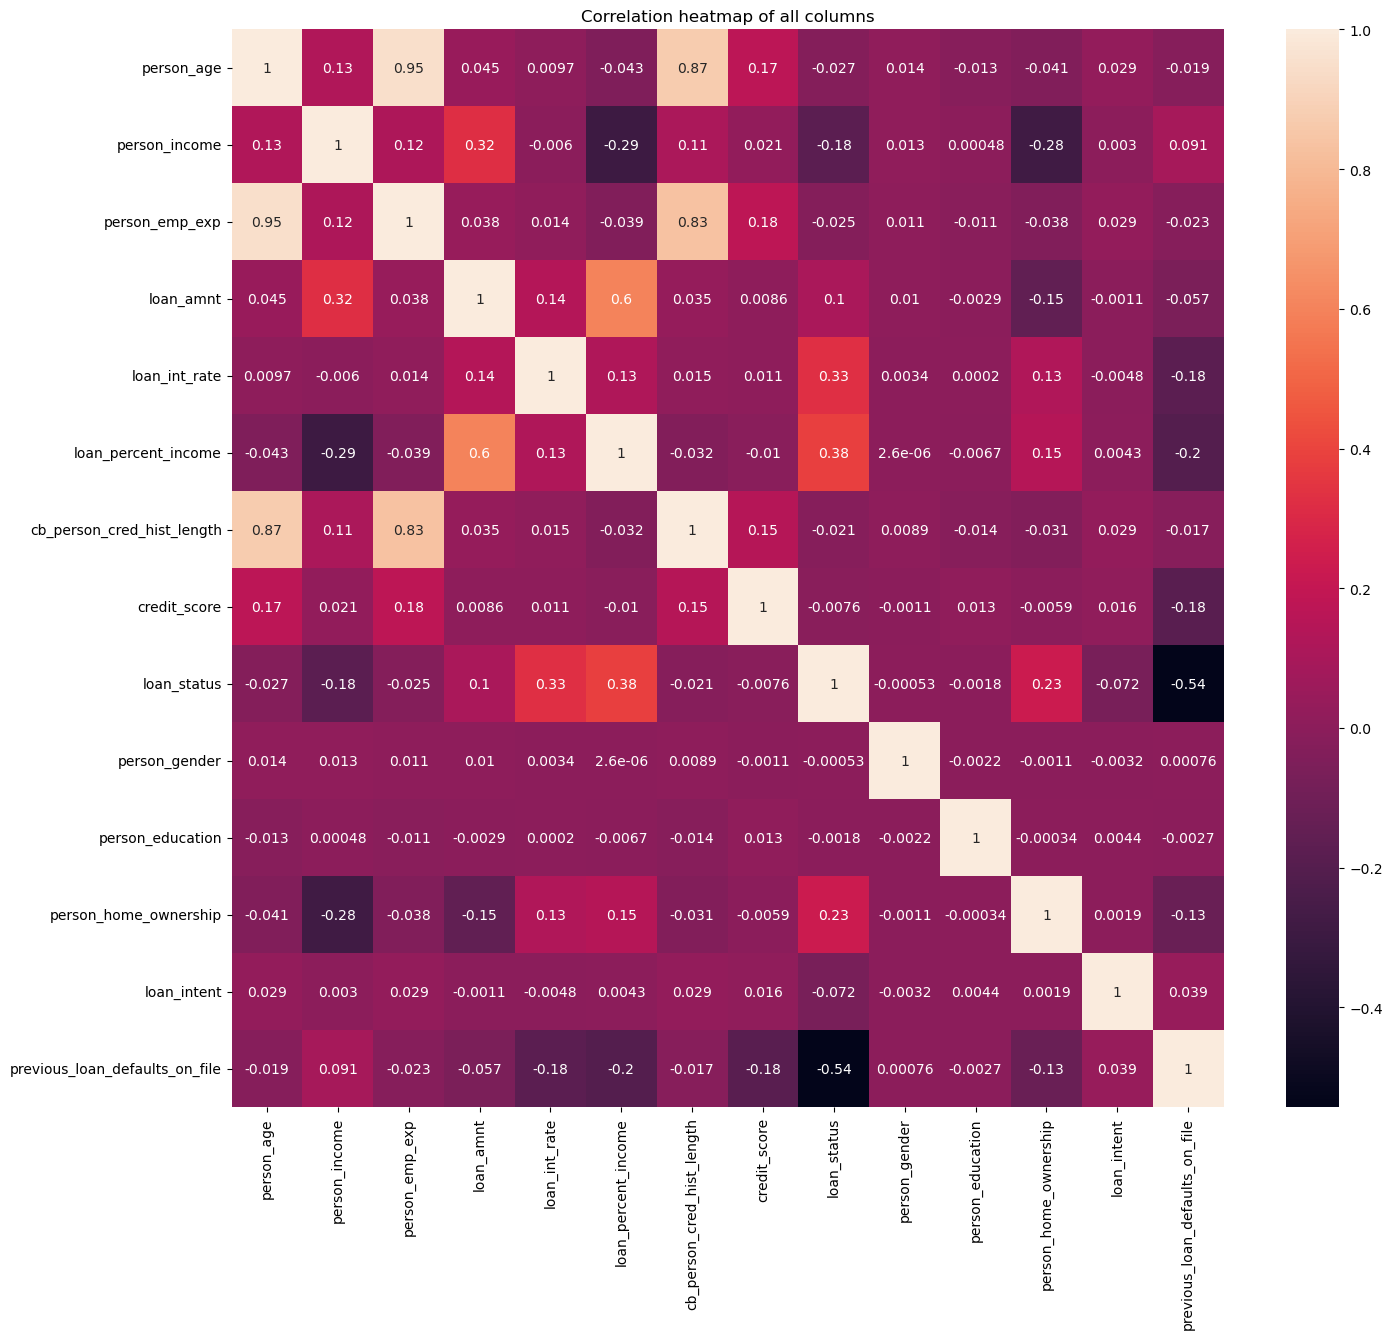

In [38]:
# Creating a heatmap visualising features correlation

def correlationHeatmap(data):
    plt.figure(figsize=(16,14))
    plt.title('Correlation heatmap of all columns')
    sns.heatmap(loans_encoded.corr(), annot=True)
    plt.show()
    
correlationHeatmap(loans_encoded)  

### Selected features

In [39]:
features = ['person_income', 'person_home_ownership','loan_amnt','loan_int_rate','loan_percent_income',
            'previous_loan_defaults_on_file']

target = ['loan_status']

x = loans_encoded[features]
y = loans_encoded[target]

### Perfoming 70-15-15 data split

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay
from imblearn.over_sampling import SMOTE

# setting a constant random state to choose the same data sample
random_state = 42

# performing a 70-15-15 split on the original dataset
x_train, x_temp, y_train, y_temp = train_test_split(x, y, test_size=0.3, random_state=random_state)
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=random_state)

#reampling the dataset using SMOTE to generate synthetic data samples
#The sampling is based on selecting the minority class sample and finding its k-nearest neigbors to generate new samples
smote = SMOTE(random_state=42)
x_resampled, y_resampled = smote.fit_resample(x, y)

#x_train, x_temp, y_train, y_temp = train_test_split(x_resampled, y_resampled, test_size=0.3, random_state=random_state)
#x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=random_state)

In [41]:
y_train = y_train.squeeze() 
y_test = y_test.squeeze()

# 3. Classification models

## 3.1 Logistic regression

f1 score: 0.7378303198887344
Precision score: 0.7660649819494585
Recall score: 0.7116029510395707


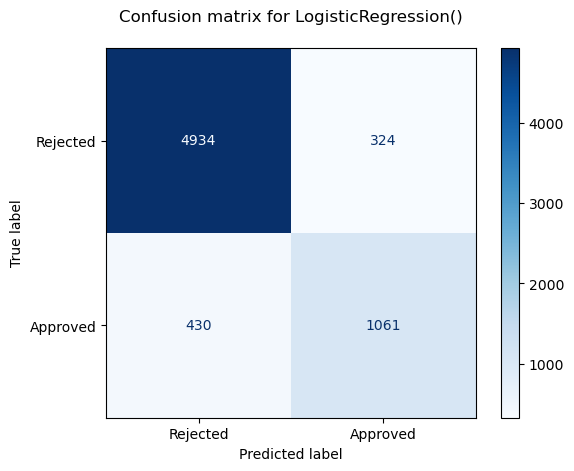

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

# initialising logistic regression
LRClassifier = LogisticRegression()

# training the model on the train dataset
LRClassifier.fit(x_train, y_train)

# predicting the model on the test datasplit
y_pred = LRClassifier.predict(x_test)

# calculating F1 and Precision metrics
F1Score = metrics.f1_score(y_test, y_pred)
PrecisionScore = metrics.precision_score(y_test, y_pred)
RecallScore = metrics.recall_score(y_test, y_pred)

# defining a function to print a confusion matrix for each model
def ConfusionMatrix(model, x_test, x_pred):
    labels = ["Rejected", "Approved"]
    ConfusionMatrixDisplay.from_estimator(model, x_test, y_test, cmap=plt.cm.Blues, display_labels=labels)
    plt.title('Confusion matrix for ' + str(model), y=1.05, fontsize=12)
    plt.show

# Displaying scores and confusion matrix
print(f'f1 score: {F1Score}')
print(f'Precision score: {PrecisionScore}')
print(f'Recall score: {RecallScore}')

ConfusionMatrix(LRClassifier, x_test, y_test)

## 3.2 Random Forest Classifier

f1 score: 0.8129445234708393
Precision score: 0.8652535957607873
Recall score: 0.7665995975855131


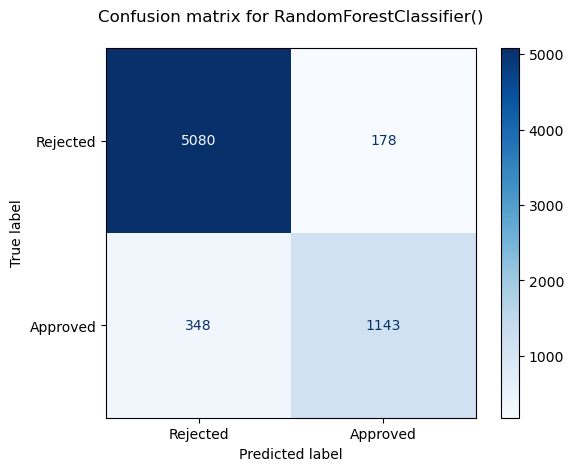

In [43]:
from sklearn.ensemble import RandomForestClassifier

# initialising random forest classification
RFClassifier = RandomForestClassifier()

# training the model on the train dataset
RFClassifier.fit(x_train, y_train)

# predicting the model on the test datasplit
y_pred = RFClassifier.predict(x_test)

# calculating F1 and Precision metrics
F1Score = metrics.f1_score(y_test, y_pred)
PrecisionScore = metrics.precision_score(y_test, y_pred)
RecallScore = metrics.recall_score(y_test, y_pred)

print(f'f1 score: {F1Score}')
print(f'Precision score: {PrecisionScore}')
print(f'Recall score: {RecallScore}')

ConfusionMatrix(RFClassifier, x_test, y_test)

## 3.3 AdaBoost classification

f1 score: 0.7896811178788964
Precision score: 0.8476923076923077
Recall score: 0.7391012743125419


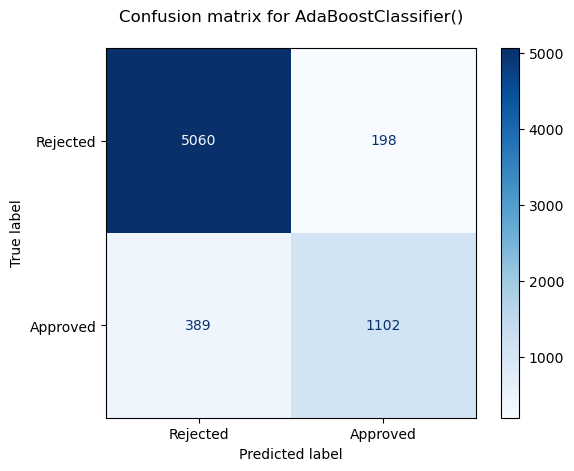

In [44]:
from sklearn.ensemble import AdaBoostClassifier

# initialising XGBoost classification model
AdaBClassifier = AdaBoostClassifier()

# fitting the model on the train data split
AdaBClassifier.fit(x_train, y_train)

# predicting the model using the test dataset
y_pred = AdaBClassifier.predict(x_test)

# calculating F1 and Precision metrics
F1Score = metrics.f1_score(y_test, y_pred)
PrecisionScore = metrics.precision_score(y_test, y_pred)
RecallScore = metrics.recall_score(y_test, y_pred)

print(f'f1 score: {F1Score}')
print(f'Precision score: {PrecisionScore}')
print(f'Recall score: {RecallScore}')

ConfusionMatrix(AdaBClassifier, x_test, y_test)

# 4. Evaluation

# Original scores:

### Logistic regression scores:
    - f1 score: 0.7232746955345061
    - Precision score: 0.7565463552724699
    - Recall score: 0.6928062216461439
    
### Random Forest Classifier scores:
    - f1 score: 0.8087837837837839
    - Precision score: 0.844742413549753
    - Recall score: 0.7757615035644848
   
### AdaBoost Classifier scores:
    - f1 score: 0.7738831615120275
    - Precision score: 0.8237015362106803
    - Recall score: 0.729747245625405


# Resampled scores:

### Logistic regression scores:
    - f1 score: 0.870639534883721
    - Precision score: 0.8239339752407153
    - Recall score: 0.9229583975346687
    
### Random Forest Classifier scores:
    - f1 score: 0.93325770467007
    - Precision score: 0.9164500556999629
    - Recall score: 0.9506933744221879
   
### AdaBoost Classifier scores:
    - f1 score: 0.877751756440281
    - Precision score: 0.8544592376436257
    - Recall score: 0.9023497688751926
    
## Best performing classification model:  
###  Random Forest Classifier 

## Worst performing classification model:   
### AdaBoost Classifier

# --------------------

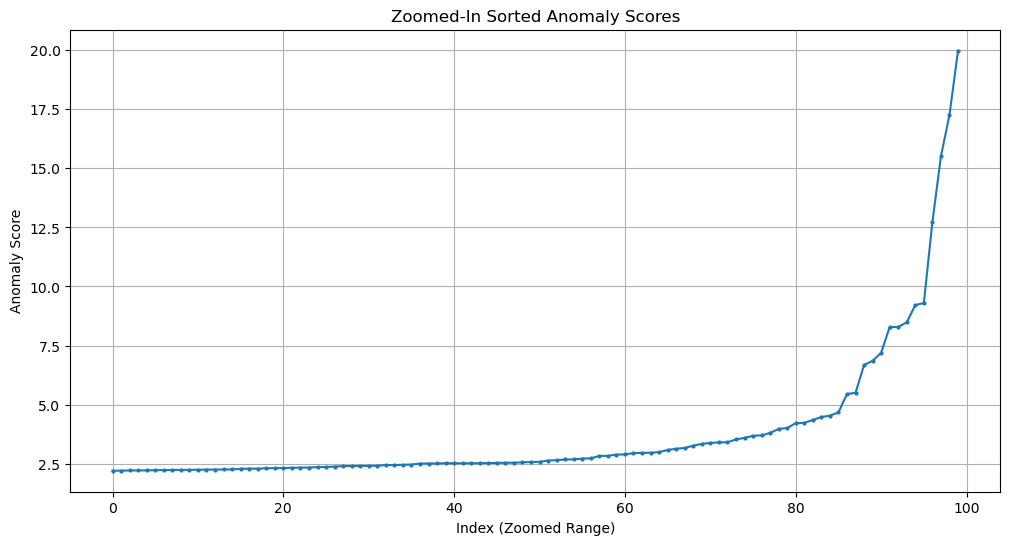

In [45]:
# Sort anomaly scores
sorted_scores = np.sort(anomalyScores)

# Define the range of scores to display (e.g., the first 2000 points)
num_points = 100  # Adjust as needed
subset_scores = sorted_scores[-100:]

# Plot the zoomed-in anomaly scores
plt.figure(figsize=(12, 6))
plt.plot(range(num_points), subset_scores, marker='o', markersize=2, linestyle='-')
plt.title("Zoomed-In Sorted Anomaly Scores")
plt.xlabel("Index (Zoomed Range)")
plt.ylabel("Anomaly Score")
plt.grid()
plt.show()


# -------------------

# # Sort anomaly scores
# sorted_scores = np.sort(anomalyScores)

# # Plot
# plt.figure(figsize=(10, 10))
# plt.plot(sorted_scores)
# plt.title("Anomaly Scores")
# plt.xlabel("Index")
# plt.ylabel("Anomaly Score")
# plt.show()